loading data


<Figure size 1000x800 with 0 Axes>

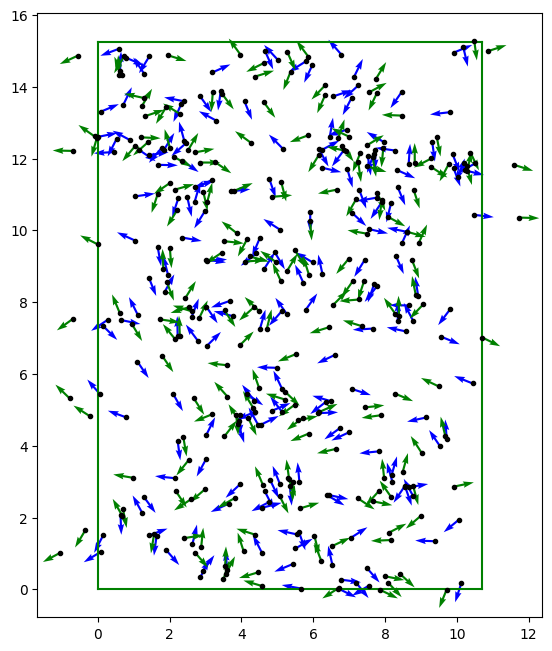

In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


#Global diensions
w, h = 10.7, 15.24
n = 200
µu, varu = [1.2, 0, 0], [0.1, 0.1, 0.1]


def draw_env():
    plt.plot((0, w), (0, 0), 'g')
    plt.plot((0, 0), (h, 0), 'g')
    plt.plot((w, w), (h, 0), 'g')
    plt.plot((0, w), (h, h), 'g')
    plt.grid()


def draw_particles_(p, color):
    xs, ys, thetas = p.T
    plt.plot(xs, ys, 'k.')
    plt.quiver(xs, ys, np.cos(thetas), np.sin(thetas), color=color)


def draw_points_one_trial(position_polar):
    position = np.array([[position_polar[i, 1] * np.cos(position_polar[i, 0] * np.pi / 180),
                          position_polar[i, 1] * np.sin(position_polar[i, 0] * np.pi / 180)]
                         for i in range(position_polar.shape[0])])

    for i in range(position.shape[0]):
        plt.plot(position[:, 0], position[:, 1], 'ro', markersize=1)


def move_particles(p):
    newP = []
    for x, y, theta in p:
        #Motion Model
        mx = µu[0] * np.cos(theta)
        my = µu[1] * np.sin(theta)
        mtheta = 0
        #Estimation
        µx = x + mx
        µy = y + my
        µtheta = theta + mtheta
        #Sampling
        xt = np.random.normal(µx,varu[0])
        yt = np.random.normal(µy,varu[1])
        thetat = np.random.normal(µtheta,varu[2])
        #Add to the list
        newP.append([xt, yt, thetat])
    return np.array(newP)


if __name__ == "__main__":
    print("loading data")
    with open("samples.dat", "rb") as f:
        positions = pickle.load(f)

    fig = plt.figure(figsize=(10, 8), frameon=True, dpi=100)
    #ax = fig.add_subplot(111)
    #ax.set_aspect("equal")
    #ax.grid()

    #position_polar = np.array(positions[0])
    #draw_points_one_trial(position_polar)

    fig = plt.figure(figsize=(10, 8), frameon=True, dpi=100)
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.grid()

    xs = np.random.sample(n) * w
    ys = np.random.sample(n) * h
    theta = np.random.sample(n) * 2 * np.pi

    p = np.vstack((xs, ys, theta)).T
    draw_env()
    draw_particles_(p, 'b')
    newP = move_particles(p)
    draw_particles_(newP, 'g')